## Unsupervised Machine Learning: Clustering

## 1- Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

## Importing data and conducting cleaning, manipulation & standardization

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# create path
path=r'C:\Users\Jatin\Documents\ApartmentRentalInGermany'

In [4]:
df=pd.read_csv(os.path.join(path,'Data','Prepared Data','df_immo.csv'))

In [5]:
pd.options.display.max_columns=None

In [6]:
# Creating a new dataframe to put standarizied variable
df_1=pd.DataFrame()

In [7]:
df_1['serviceCharge'] = (df['serviceCharge'] - df['serviceCharge'].mean()) / df['serviceCharge'].std()

In [8]:
df_1['totalRent'] = (df['totalRent'] - df['totalRent'].mean()) / df['totalRent'].std()

In [9]:
df_1['yearConstructed'] = (df['yearConstructed'] - df['yearConstructed'].mean()) / df['yearConstructed'].std()

In [10]:
df_1['baseRent'] = (df['baseRent'] - df['baseRent'].mean()) / df['baseRent'].std()

In [11]:
df_1['livingSpace'] = (df['livingSpace'] - df['livingSpace'].mean()) / df['livingSpace'].std()

In [12]:
df_1['numberOfRooms'] = (df['numberOfRooms'] - df['numberOfRooms'].mean()) / df['numberOfRooms'].std()

In [13]:
df_1['floor'] = (df['floor'] - df['floor'].mean()) / df['floor'].std()

In [14]:
df_1.head()

,serviceCharge,totalRent,yearConstructed,baseRent,livingSpace,numberOfRooms,floor
0,0.310272,0.024667,-0.116757,-0.004673,0.390632,0.531132,-0.334007
1,-0.056903,0.143641,-2.867348,0.005874,0.484277,0.152793,-0.029542
2,0.343350,0.907381,1.463369,0.014363,0.321960,0.152793,0.274922
3,-0.307805,0.143641,-0.146019,-0.017638,-0.478700,0.152793,0.274922
4,-0.043671,0.145560,-0.555681,0.004073,0.358481,0.152793,-0.334007


## 3- Elbow technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [16]:
score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Jatin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jatin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jatin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jatin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jatin\anaconda3\lib\site-packages\sklearn\clust

[-1854110.9999997863,
 -1576245.371647506,
 -1311622.7816049499,
 -1078754.071961381,
 -906365.7458284773,
 -740469.5009721674,
 -598492.1580348022,
 -515724.98328440904,
 -476102.0531991548]

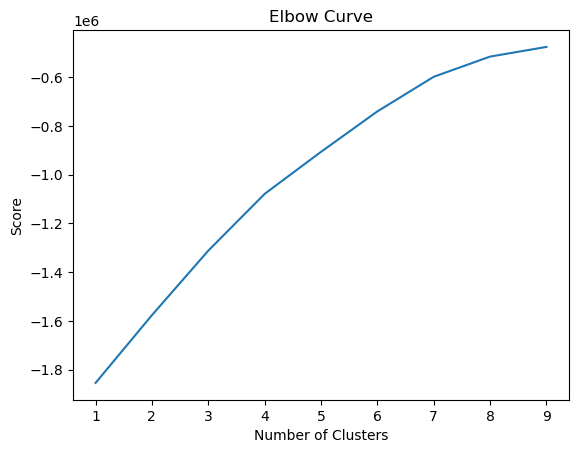

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()# Create the k-means object.

kmeans = KMeans(n_clusters = 8) 


### 4- Since it is visible that the curve tends to flat at n=8. So, the optimal number of clusters that I am choosing is 8. 

## 5- K-means Clustering

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df_1)

C:\Users\Jatin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

## 6- Attaching column 'clusters'

In [20]:
# Attaching column in 'df' dataframe (original dataframe)
df['clusters'] = kmeans.fit_predict(df_1)

C:\Users\Jatin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
df.head()

,Unnamed: 0.1,Unnamed: 0,state,serviceCharge,heatingType,newlyConstructed,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,lift,typeOfFlat,geo_plz,numberOfRooms,floor,garden,district,city,date,Rent_livingSpace,Rent_yearConstructed,clusters
0,0,0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965,False,True,595.0,86.00,well_kept,False,ground_floor,44269,4,1,True,Dortmund,Schüren,May19,Low price,Middle price1,2
1,1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,902.0,1871,False,False,800.0,89.00,refurbished,False,ground_floor,67459,3,2,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19,Low price,Low price1,1
2,2,2,Sachsen,255.00,floor_heating,True,True,1300.0,2019,False,True,965.0,83.80,first_time_use,True,apartment,1097,3,3,False,Dresden,Äußere_Neustadt_Antonstadt,Oct19,Low price,High price1,2
3,3,3,Sachsen,58.15,district_heating,False,True,902.0,1964,False,False,343.0,58.15,NaN,False,other,9599,3,3,False,Mittelsachsen_Kreis,Freiberg,May19,Low price,Middle price1,0
4,4,4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950,False,False,765.0,84.97,refurbished,False,apartment,28213,3,1,False,Bremen,Neu_Schwachhausen,Feb20,Low price,Middle price1,1


In [22]:
df['clusters'].value_counts()

0    136052
2     70986
1     46447
6     11381
5         4
7         2
4         1
3         1
Name: clusters, dtype: int64

In [23]:
# Considering only those clusters which has counts more than 4
df=df[df['clusters'].isin([0,1,2,6])]

## 7- Plotting clusters

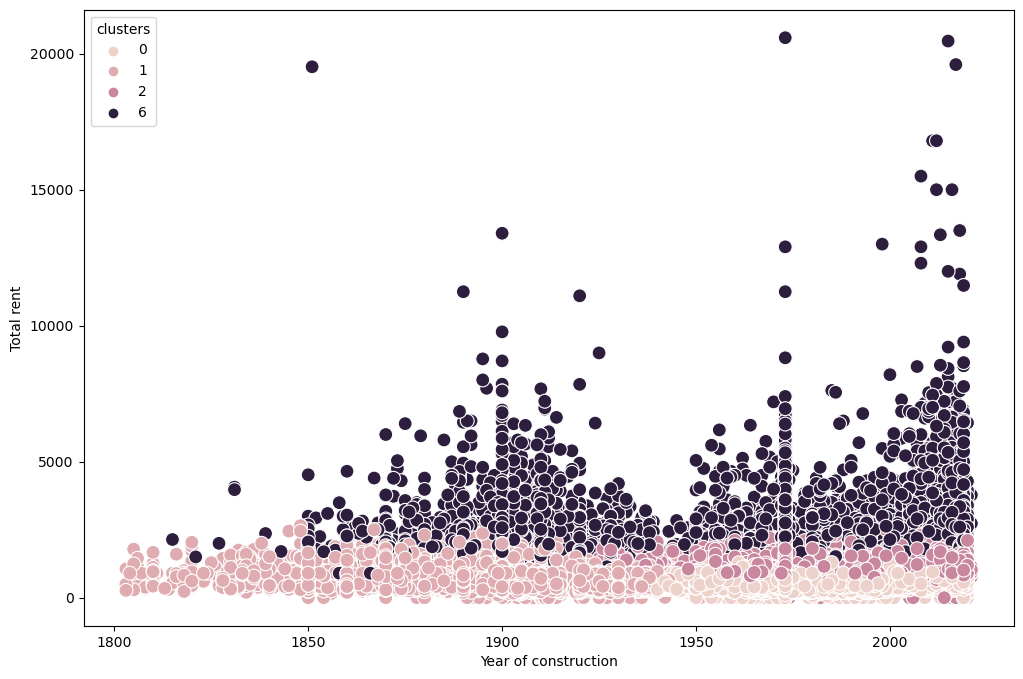

In [24]:
# Plot the clusters for the "yearConstructed" and "totalRent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['yearConstructed'], y=df['totalRent'], hue=df.clusters, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year of construction') # Label x-axis.
plt.ylabel('Total rent') # Label y-axis.
plt.show()

In the plot above, it is noteworthy that clusters 2, 0, and 1 exhibit similar rental rates, despite the fact that cluster 1 represents older properties while clusters 0 and 2 represent newer ones. What is particularly intresting is that cluster 6 consistently represents properties with the highest rental rates, regardless of their year of construction.

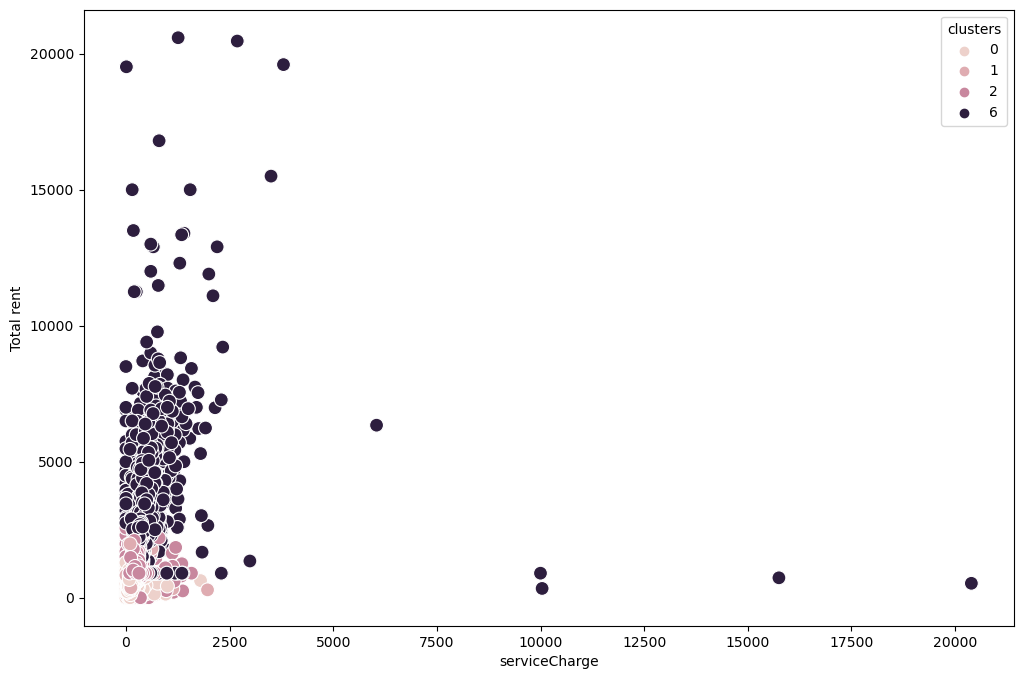

In [29]:
# Plot the clusters for the "service charge" and "totalRent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['serviceCharge'], y=df['totalRent'], hue=df.clusters, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('serviceCharge') # Label x-axis.
plt.ylabel('Total rent') # Label y-axis.
plt.show()

The plot illustrates that, regardless of a nearly uniform service charge, all clusters exhibit variations in total rent. Notably, Cluster 6 stands out with significantly higher rental rates compared to the others.

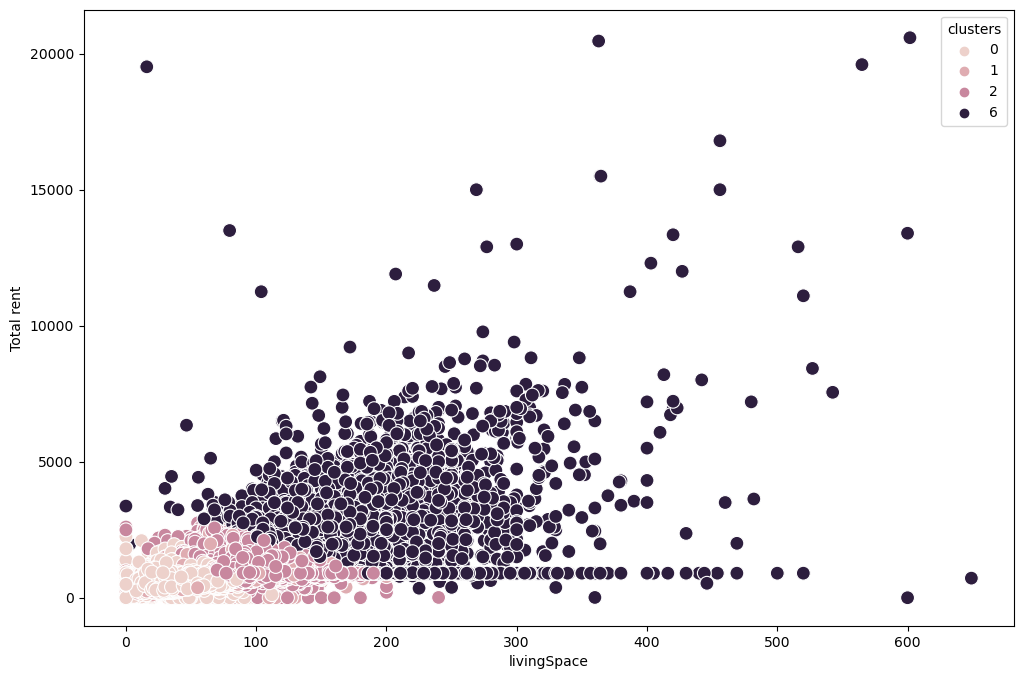

In [30]:
# Plot the clusters for the "living space" and "totalRent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['livingSpace'], y=df['totalRent'], hue=df.clusters, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('livingSpace') # Label x-axis.
plt.ylabel('Total rent') # Label y-axis.
plt.show()

In this plot, Cluster 0 is characterized by lower total rent, accompanied by smaller living spaces, followed by Clusters 1 and 2. Conversely, Cluster 6 stands out with the highest total rent, correlating with larger living spaces, which aligns with our expectations.

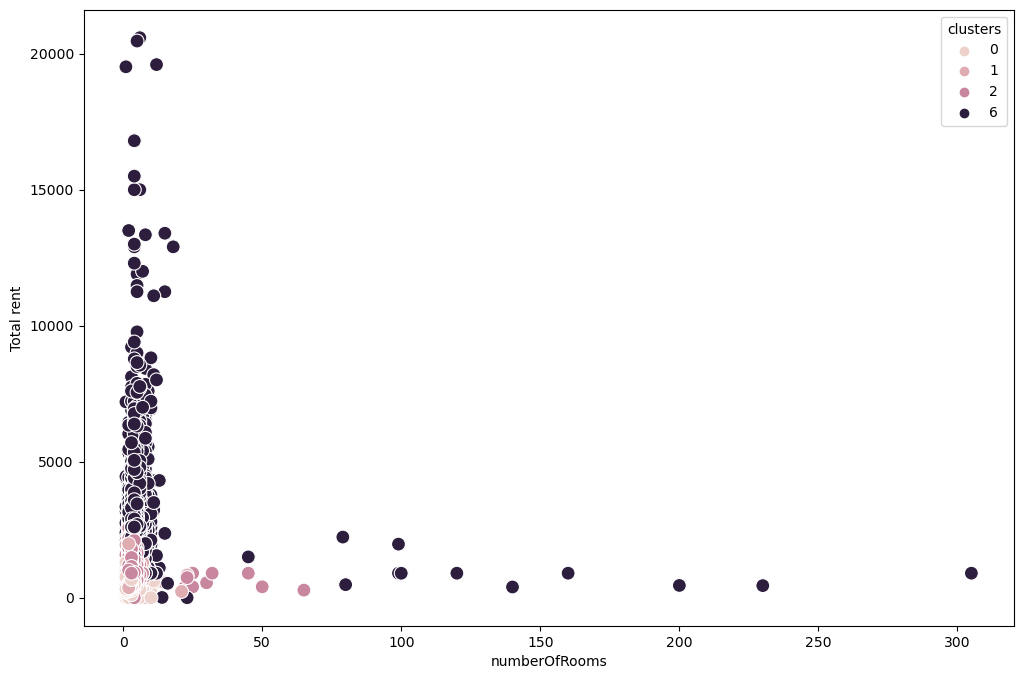

In [31]:
# Plot the clusters for the "number of rooms" and "totalRent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['numberOfRooms'], y=df['totalRent'], hue=df.clusters, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('numberOfRooms') # Label x-axis.
plt.ylabel('Total rent') # Label y-axis.
plt.show()

The number of rooms does not seem to have a clear correlation with total rent, as evident from the mixed distribution across all clusters. Instead, the predominant factor driving higher rent appears to be the property's color, with black-colored properties consistently standing out with higher rental rates.

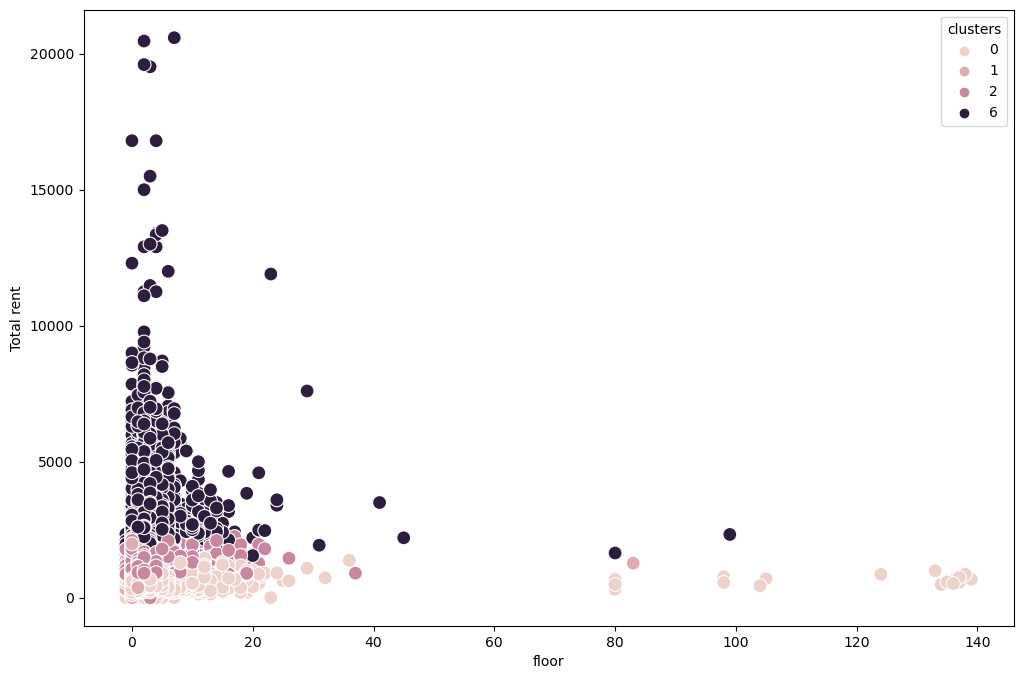

In [32]:
# Plot the clusters for the "floor" and "totalRent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['floor'], y=df['totalRent'], hue=df.clusters, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('floor') # Label x-axis.
plt.ylabel('Total rent') # Label y-axis.
plt.show()

It is worth noting that Clusters 0, 1, and 2, despite having more floors, exhibit lower total rent values, whereas Cluster 6, despite having fewer floors compared to other clusters, consistently boasts higher total rent.

## 9- Descriptive statistics for clusters

In [33]:
#Creating flags for diffent clusters and creating a column 'cluster'

df.loc[df['clusters'] == 6, 'cluster'] = 'black'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [34]:
#grouping by 'cluster' colors and calculating statistics

df.groupby('cluster').agg({'yearConstructed':['mean', 'median'], 
                         'livingSpace':['mean', 'median'], 
                         'numberOfRooms':['mean', 'median'],
                          'floor':['mean', 'median'],
                          'serviceCharge':['mean', 'median'],
                          'totalRent':['mean','median']})

yearConstructed         livingSpace         numberOfRooms         \
                       mean  median        mean  median          mean median   
cluster                                                                        
black           1974.491521  1974.0  158.061201  150.00      4.312187    4.0   
dark purple     1992.169076  1993.0   96.287268   92.89      3.175880    3.0   
light pink      1976.511657  1973.0   56.104303   58.00      2.183165    2.0   
pink            1910.185265  1910.0   68.828146   64.66      2.465929    2.0   

                floor        serviceCharge            totalRent           
                 mean median          mean  median         mean   median  
cluster                                                                   
black        2.406818    2.0    350.047517  329.06  2364.853193  2147.17  
dark purple  1.912039    2.0    197.448114  200.00  1103.117140   995.00  
light pink   2.221099    2.0    115.362437  113.00   605.893470   562.00  
pink         1.882856    2.0    133.641514  125.00   676.684545   598.73

It would be interesting to delve deeper into the characteristics of the Black Cluster, particularly in terms of its geographical distribution. Identifying which regions are associated with the Black Cluster (highest rent) and contrasting them with the regions represented by the light pink Cluster (lowest rent) could provide valuable insights. So far, the Black Cluster distinguishes itself across all variables, including greater living space, a higher number of rooms, and a lower service charge. 

In [35]:
# exporting data frame
df.to_csv(os.path.join(path,'Data','Prepared Data','df_final.csv'))